# Connect proteins to external data sources
I've shown that I can identify a small subset of proteins that predict titer. Here I want to try to connect those proteins to other databases, including a genome scale model, gene ontology, and KEGG.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Import data

In [2]:
data_file = './data/normalized_proteomics_pivot.csv'
omics = pd.read_csv(data_file, index_col=0)
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5417,PP_5418,PP_5419,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.952586,0.000000,1.086405,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129,1.024392
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.053211,0.022315,0.781209,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979,1.120367
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.955814,6.881715,1.060845,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022,1.178920
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.037332,0.021247,1.206203,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219,0.720284
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.899485,0.045492,0.884382,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c1,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.871891,0.028549,0.024475,0.036465,0.972795,0.033226,1.222933,1.042099,1.008801,2.153361
PP_5419-R3_c1,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.767842,0.029056,0.024909,0.037112,0.938466,0.009552,1.087679,1.080355,1.079077,2.397354
PP_5420-R1_c1,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.892056,0.084788,0.010848,0.030160,0.705855,0.000445,0.730318,0.143453,1.447907,0.484521


In [3]:
omics.loc[omics['isoprenol'].isna(), 'isoprenol']
omics = omics.dropna(axis = 0, how = 'any', subset=['isoprenol'])
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5417,PP_5418,PP_5419,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.952586,0.000000,1.086405,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129,1.024392
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.053211,0.022315,0.781209,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979,1.120367
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.955814,6.881715,1.060845,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022,1.178920
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.037332,0.021247,1.206203,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219,0.720284
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.899485,0.045492,0.884382,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c1,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.871891,0.028549,0.024475,0.036465,0.972795,0.033226,1.222933,1.042099,1.008801,2.153361
PP_5419-R3_c1,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.767842,0.029056,0.024909,0.037112,0.938466,0.009552,1.087679,1.080355,1.079077,2.397354
PP_5420-R1_c1,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.892056,0.084788,0.010848,0.030160,0.705855,0.000445,0.730318,0.143453,1.447907,0.484521


In [4]:
omics = omics.dropna(axis = 1, how = 'any')
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5417,PP_5418,PP_5419,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.952586,0.000000,1.086405,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129,1.024392
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.053211,0.022315,0.781209,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979,1.120367
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.955814,6.881715,1.060845,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022,1.178920
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.037332,0.021247,1.206203,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219,0.720284
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.899485,0.045492,0.884382,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c1,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.871891,0.028549,0.024475,0.036465,0.972795,0.033226,1.222933,1.042099,1.008801,2.153361
PP_5419-R3_c1,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.767842,0.029056,0.024909,0.037112,0.938466,0.009552,1.087679,1.080355,1.079077,2.397354
PP_5420-R1_c1,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.892056,0.084788,0.010848,0.030160,0.705855,0.000445,0.730318,0.143453,1.447907,0.484521


In [5]:
protein_measurements = omics.columns[:-1]
protein_measurements


Index(['MM_1762', 'PP_0001', 'PP_0002', 'PP_0003', 'PP_0004', 'PP_0005',
       'PP_0006', 'PP_0009', 'PP_0010', 'PP_0011',
       ...
       'PP_5416', 'PP_5417', 'PP_5418', 'PP_5419', 'SPy_1046', 'YNR043W',
       'aacC1', 'b4055 JW4015', 'mvaS', 'neo'],
      dtype='object', length=1956)

In [6]:
X = omics[protein_measurements]
y = omics['isoprenol']
X

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5416,PP_5417,PP_5418,PP_5419,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.792854,0.952586,0.000000,1.086405,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,0.872016,1.053211,0.022315,0.781209,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.890724,0.955814,6.881715,1.060845,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.008304,1.037332,0.021247,1.206203,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.991993,0.899485,0.045492,0.884382,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c1,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.630470,0.871891,0.028549,0.024475,0.036465,0.972795,0.033226,1.222933,1.042099,1.008801
PP_5419-R3_c1,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.596430,0.767842,0.029056,0.024909,0.037112,0.938466,0.009552,1.087679,1.080355,1.079077
PP_5420-R1_c1,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.726382,0.892056,0.084788,0.010848,0.030160,0.705855,0.000445,0.730318,0.143453,1.447907


In [7]:
y

line_name_rep_cycle
Control-R10_c1    1.024392
Control-R11_c1    1.120367
Control-R12_c1    1.178920
Control-R13_c1    0.720284
Control-R14_c1    1.030501
                    ...   
PP_5419-R2_c1     2.153361
PP_5419-R3_c1     2.397354
PP_5420-R1_c1     0.484521
PP_5420-R2_c1     0.527125
PP_5420-R3_c1     0.556424
Name: isoprenol, Length: 771, dtype: float64

In [8]:
omics_index = omics.index.values
cycle_label = [int(x[-1]) for x in omics_index]
num_grna = [x.count('PP') for x in omics_index]
is_control = [1 if 'ontrol' in x else 0 for x in omics_index]

### Scale data for ML

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm
X_norm_df = X.copy()
X_norm_df.iloc[:,:] = X_norm
X_norm_df

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5416,PP_5417,PP_5418,PP_5419,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,-0.102166,0.412906,0.234946,0.700704,0.181735,-0.708630,0.170463,0.479386,0.684596,0.231724,...,-0.818604,-0.469396,-0.653509,0.765761,1.372145,-0.045578,0.288396,0.187952,-0.050358,0.674865
Control-R11_c1,0.385404,-0.666563,-0.046401,0.285979,0.044311,-0.693040,0.917614,0.365204,0.362861,0.813506,...,-0.532057,0.123802,-0.638420,0.162689,0.965124,0.307747,0.427672,0.618061,0.089033,0.453091
Control-R12_c1,0.424413,0.906156,-0.901531,0.771687,0.217843,1.041760,0.480422,0.098781,0.047185,0.706344,...,-0.464337,-0.450368,3.999496,0.715254,1.155829,0.119954,0.424968,-0.307437,0.067182,0.765453
Control-R13_c1,-0.194499,0.267968,1.724661,0.040207,0.287485,-0.293082,0.575779,0.913274,0.636137,0.793917,...,-0.038721,0.030195,-0.639143,1.002481,0.339394,0.072312,0.041777,-0.311570,-0.198387,-0.252587
Control-R14_c1,-0.262194,1.079722,0.510109,0.354131,-0.212011,-0.532722,0.695571,0.692524,-0.347891,0.711988,...,-0.097764,-0.782435,-0.622749,0.366559,0.526535,0.222085,-0.138436,-0.038662,-0.378058,0.561321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c1,-0.714633,0.361215,-2.016182,-1.086152,-1.377255,0.899406,-1.366481,-1.111541,-0.960341,0.025953,...,-1.406399,-0.945107,-0.634205,-1.332627,-1.432407,-0.119540,-2.424508,0.614866,0.055926,0.235537
PP_5419-R3_c1,-0.596398,0.469312,-1.361407,-0.848928,-0.681300,2.480309,-1.437309,-0.799445,0.739010,-0.084901,...,-1.529615,-1.558485,-0.633863,-1.331769,-1.430942,-0.276708,-2.488133,0.221910,0.143742,0.540231
PP_5420-R1_c1,0.168493,0.446262,-1.042606,-0.566305,-1.661877,1.313698,-3.414344,-1.469318,-0.246741,-1.793556,...,-1.059218,-0.826229,-0.596180,-1.359554,-1.446678,-1.341675,-2.512607,-0.816338,-2.006862,2.139376


### LASSO
LASSO is a form of linear regression, which identifies models that look like this:

$titer = b_1 * P_1 + b_2 * P_2 + ... + b_n + P_n$

where the b values are coefficients to be learned and the P values are measured proteomics. 

LASSO uses regularization to identify sparse models. Regularization penalizes models with large coefficient values, which can prevent overfitting. Specifically, LASSO regularization favors models with parameters that are exactly zero, so it can be used to identify important features by looking at which small set of features is used to predict titer.

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error

We can also plot the coefficients for a specific alpha value. Here I'll use 10 (1e1), since it fits the data pretty well and doesn't have very many non-zero coefficients. 

In [11]:
y

line_name_rep_cycle
Control-R10_c1    1.024392
Control-R11_c1    1.120367
Control-R12_c1    1.178920
Control-R13_c1    0.720284
Control-R14_c1    1.030501
                    ...   
PP_5419-R2_c1     2.153361
PP_5419-R3_c1     2.397354
PP_5420-R1_c1     0.484521
PP_5420-R2_c1     0.527125
PP_5420-R3_c1     0.556424
Name: isoprenol, Length: 771, dtype: float64

Text(0, 0.5, 'Real titer')

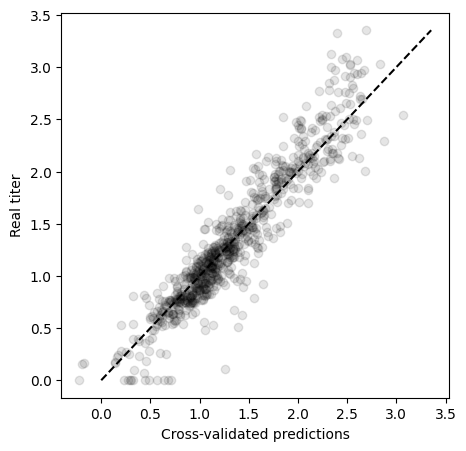

In [12]:
alpha_for_features = 1e-2
reg = Lasso(alpha = alpha_for_features)
reg.fit(X_norm, y)
coefficients = reg.coef_
coef_df = pd.DataFrame(data = coefficients, index = X_norm_df.columns, columns = ['coefficient'])

cv_preds = cross_val_predict(reg, X_norm, y)
fig, ax = plt.subplots(figsize = (5,5))
ax.plot([0, max(y)], [0, max(y)], 'k--')
ax.scatter(cv_preds, y, c = 'k', alpha = 0.1, edgecolors='k')
ax.set_xlabel('Cross-validated predictions')
ax.set_ylabel('Real titer')

Text(0.5, 1.0, 'Non-zero LASSO coefficients - alpha = 0.01')

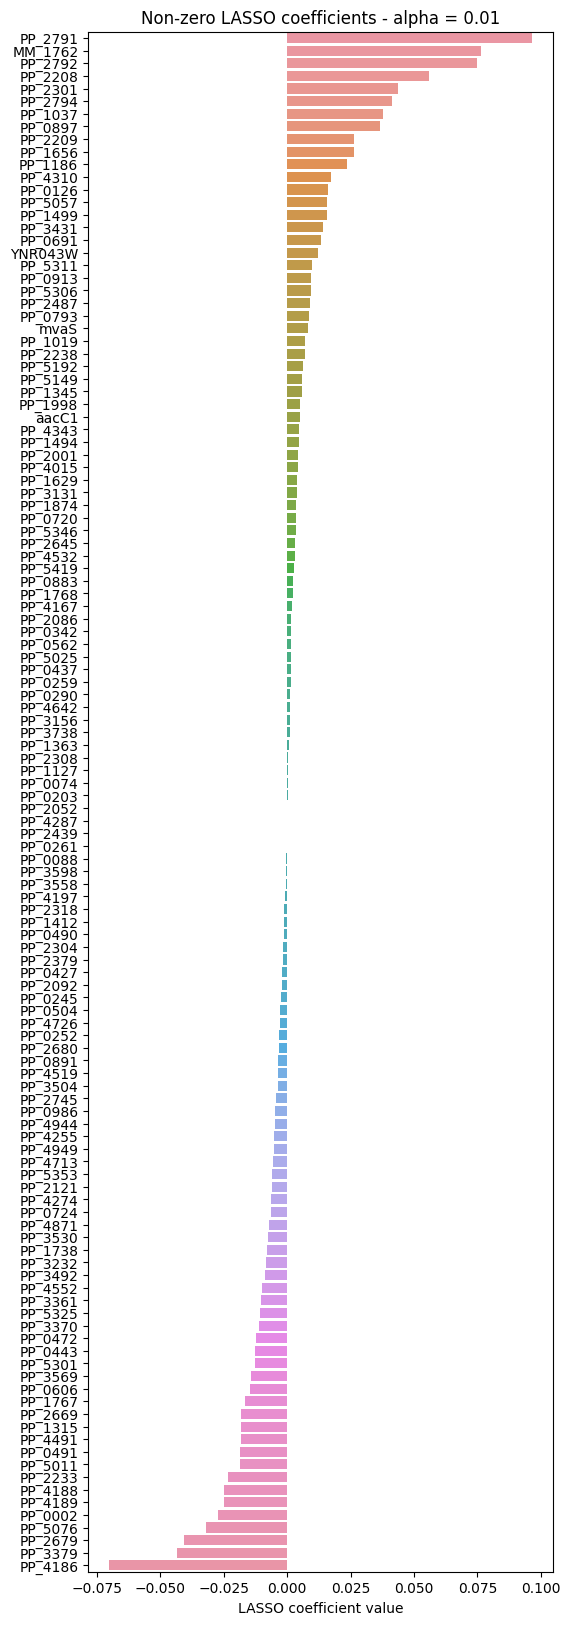

In [13]:
fig, ax = plt.subplots(figsize = (6,20))
sns.barplot(coef_df[coef_df['coefficient']!=0].sort_values('coefficient', ascending = False).T,
            orient = 'h', ax = ax)
ax.set_xlabel('LASSO coefficient value')
ax.set_title(f'Non-zero LASSO coefficients - alpha = {alpha_for_features}')

## Connect to GSM

### Install cobrapy to ART environment

In [14]:
!pip install cobra
import cobra as cobra


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


### Get genome scale model

In [15]:
f_gsm = './data/iJN1463.json'
gsm = cobra.io.load_json_model(f_gsm)
gsm_genes = [g.id for g in gsm.genes]
gsm_gene_len = [len(g.id) for g in gsm.genes]
sum(np.array(gsm_gene_len) == 8)

18

In [16]:
gsm_genes = [g.id for g in gsm.genes]
gsm_gene_len = [len(g.id) for g in gsm.genes]
sum(np.array(gsm_gene_len) == 8)

18

In [17]:
subsystems = [r.subsystem for r in gsm.reactions]
np.unique(subsystems)

array(['Aliphatic open-chain ketones metabolism',
       'Biomass and maintenance functions', 'Extracellular exchange',
       'Intracellular demand', 'Intracellular source/sink',
       'Murein Recycling', 'S_Alanine_and_Aspartate_Metabolism',
       'S_Alginate_biosynthesis', 'S_Alternate_Carbon',
       'S_Alternate_Carbon__Ascorbate_and_Aldarate_Metabolism',
       'S_Alternate_Carbon__Butanediol_Metabolism',
       'S_Alternate_Carbon__Fructose_Metabolism',
       'S_Alternate_Carbon__Levulinate_Metabolism',
       'S_Alternate_Carbon__Propanoate_Metabolism',
       'S_Alternate_Carbon__Ribose_Metabolism',
       'S_Alternate_Carbon_and_Nitrogen_source__Amines_and_Polyamines_Metabolism',
       'S_Alternate_Carbon_and_Nitrogen_source__D_Amino_acids_Metabolism',
       'S_Alternate_Carbon_and_Nitrogen_source__Dipeptide_Metabolism',
       'S_Alternate_Carbon_and_Nitrogen_source__Ectoine_Metabolism',
       'S_Alternate_Carbon_and_Nitrogen_source__Hydroxy_proline_metabolism',
      

### Make a coefficient dataframe for LASSO results

In [18]:
coef_df = pd.DataFrame(data = coefficients, index = X_norm_df.columns, columns = ['coefficient'])
coef_df = coef_df.reset_index(names='gene')
coef_df.head(3)

,gene,coefficient
0,MM_1762,0.076479
1,PP_0001,-0.000000
2,PP_0002,-0.027158


### Add GSM information to the coefficient dataframe
Add information to the coefficient dataframe from GSM including whether each gene is in the GSM, how many reactions it's involved in, and what subsystems those reactions are a part of.

In [19]:
coef_df.loc[:, 'in_gsm'] = coef_df['gene'].apply(lambda x: x in gsm_genes)
coef_df.loc[~coef_df['in_gsm'], 'num_gsm_rxns'] = 0
coef_df.loc[coef_df['in_gsm'], 'num_gsm_rxns'] = coef_df.loc[coef_df['in_gsm'], 'gene'].apply(lambda x: len(gsm.genes.get_by_id(x).reactions)).astype(int)
coef_df['num_gsm_rxns'] = coef_df['num_gsm_rxns'].astype(int)

Define function to get reaction types for each gene from the genome scale model

In [20]:
def get_rxn_types(gene, gsm):
    rxn_list = [r for r in gsm.genes.get_by_id(gene).reactions]
    return [r.subsystem for r in rxn_list]

coef_df.loc[coef_df['in_gsm'],'subsystems'] = coef_df.loc[coef_df['in_gsm'],'gene'].apply(lambda x: get_rxn_types(x, gsm))
coef_df.loc[~coef_df['in_gsm'],'subsystems'] = coef_df.loc[~coef_df['in_gsm'],'gene'].apply(lambda x: [])
coef_df.loc[:, 'n_subsystems'] = coef_df['subsystems'].apply(lambda x: len(x))
coef_df[coef_df['in_gsm']].sort_values(by = 'coefficient').head(3)

,gene,coefficient,in_gsm,num_gsm_rxns,subsystems,n_subsystems
1362,PP_4186,-0.070197,True,1,[S_TCA_Cycle],1
1092,PP_2679,-0.040519,True,2,[S_Aromatic_Compounds_Degradation__Phenylacety...,2
1777,PP_5076,-0.032145,True,1,[S_Glutamate_Metabolism],1


### Plot most common subsystems in high or low LASSO coefficients
Display the LASSO coefficients that are 

In [21]:
n_to_keep = 15
coef_df[coef_df['in_gsm']].sort_values(by = 'coefficient', ascending = True).head(n_to_keep)

,gene,coefficient,in_gsm,num_gsm_rxns,subsystems,n_subsystems
1362,PP_4186,-0.070197,True,1,[S_TCA_Cycle],1
1092,PP_2679,-0.040519,True,2,[S_Aromatic_Compounds_Degradation__Phenylacety...,2
1777,PP_5076,-0.032145,True,1,[S_Glutamate_Metabolism],1
1365,PP_4189,-0.025069,True,3,"[S_TCA_Cycle, S_TCA_Cycle, S_Lysine_Metabolism]",3
1364,PP_4188,-0.024941,True,4,"[S_Lysine_Metabolism, S_TCA_Cycle, S_TCA_Cycle...",4
1739,PP_5011,-0.018735,True,1,[S_Cofactor_and_Prosthetic_Group_Biosynthesis_...,1
224,PP_0491,-0.018580,True,1,[S_Formaldehyde_Metabolism],1
1475,PP_4491,-0.018433,True,1,[S_Aromatic_Compounds_Degradation__Homogentisa...,1
1087,PP_2669,-0.018129,True,2,"[S_Transport__solvent_extrusion, S_Transport__...",2
278,PP_0606,-0.014686,True,2,[S_Cofactor_and_Prosthetic_Group_Biosynthesis_...,2


Each entry in the 'subsystems' field is a list - get all of the lists, and then iterate through them to get all the subsystems in a single list. 

Using `set` removes duplicates.

In [22]:
subsystems_list_of_lists = coef_df[coef_df['in_gsm']].sort_values(by = 'coefficient', ascending = True).head(n_to_keep)['subsystems']
subsystem_list =[s for single_list in subsystems_list_of_lists for s in set(single_list)]

Text(0.5, 0, 'Count')

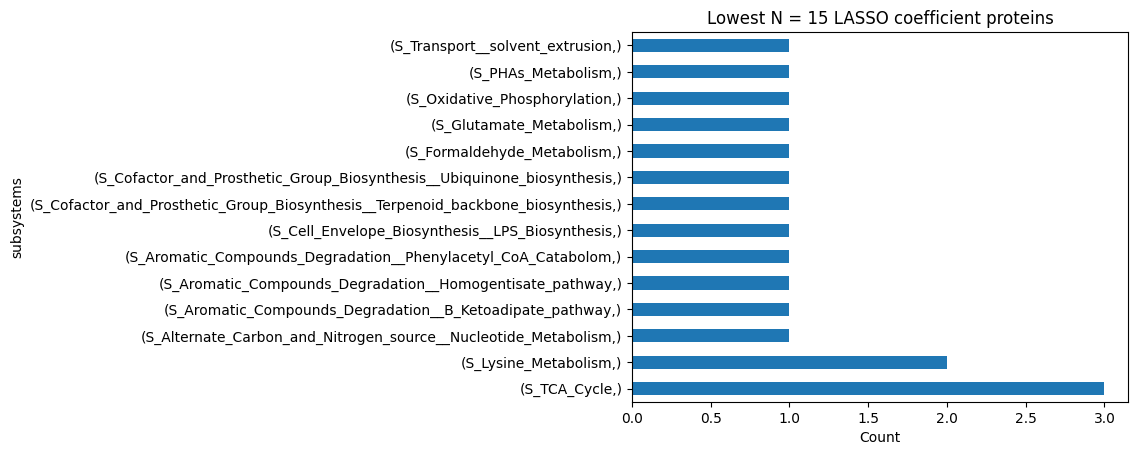

In [23]:
subsystem_df = pd.DataFrame(data = subsystem_list, columns=['subsystems'])

ax = subsystem_df.value_counts().plot(kind = 'barh')
ax.set_title(f'Lowest N = {n_to_keep} LASSO coefficient proteins')
ax.set_xlabel('Count')

In [24]:
coef_df.loc[coef_df['gene'] == 'PP_5306', 'subsystems'].values[0]

['S_Iron_uptake_and_metabolism',
 'S_Iron_uptake_and_metabolism',
 'S_Transport__Outer_Membrane',
 'S_Transport__Outer_Membrane',
 'S_Transport__Outer_Membrane',
 'S_Transport__Outer_Membrane',
 'S_Iron_uptake_and_metabolism',
 'S_Transport__Outer_Membrane',
 'S_Iron_uptake_and_metabolism',
 'S_Iron_uptake_and_metabolism',
 'S_Transport__Outer_Membrane',
 'S_Iron_uptake_and_metabolism',
 'S_Iron_uptake_and_metabolism',
 'S_Transport__Outer_Membrane',
 'S_Iron_uptake_and_metabolism']

In [25]:
coef_df[coef_df['in_gsm']].sort_values(by = 'coefficient', ascending = False).head(n_to_keep).drop(1901)

,gene,coefficient,in_gsm,num_gsm_rxns,subsystems,n_subsystems
1102,PP_2791,0.096491,True,1,[S_Alternate_Carbon__Levulinate_Metabolism],1
1103,PP_2792,0.074688,True,1,[S_Alternate_Carbon__Levulinate_Metabolism],1
967,PP_2208,0.055877,True,1,[S_Phosphonate_and_phosphinate_metabolism],1
1105,PP_2794,0.041150,True,2,"[S_Alternate_Carbon__Levulinate_Metabolism, S_...",2
480,PP_1037,0.037773,True,1,[S_Purine_Metabolism],1
402,PP_0897,0.036490,True,1,[S_TCA_Cycle],1
968,PP_2209,0.026375,True,1,[S_Phosphonate_and_phosphinate_metabolism],1
757,PP_1656,0.026131,True,2,"[S_Purine_Metabolism, S_Purine_Metabolism]",2
1413,PP_4310,0.017299,True,1,[S_Alternate_Carbon_and_Nitrogen_source__Nucle...,1
302,PP_0691,0.013335,True,1,[S_Glutamate_Metabolism],1


In [26]:
n_to_keep = 15
subsystems_set = coef_df[coef_df['in_gsm']].sort_values(by = 'coefficient', ascending = False).head(n_to_keep).drop(1901)['subsystems']
subsystem_list =[s for single_list in subsystems_set for s in single_list]
should_be_length = sum(len(sublist) for sublist in subsystems_set)
actual_length = len(subsystem_list)
should_be_length == actual_length

True

Text(0.5, 1.0, 'Highest N = 15 LASSO coefficient proteins')

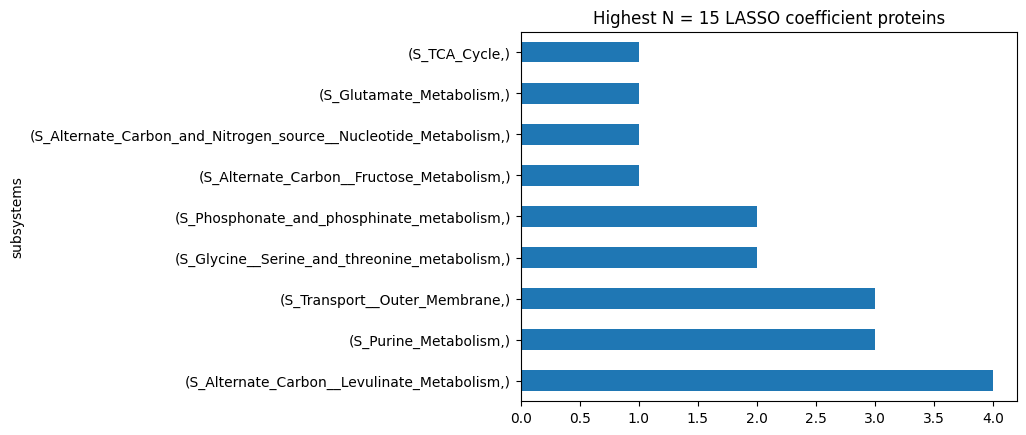

In [27]:
subsystem_df = pd.DataFrame(data = subsystem_list, columns=['subsystems'])

ax = subsystem_df.value_counts().plot(kind = 'barh')
ax.set_title(f'Highest N = {n_to_keep} LASSO coefficient proteins')

Plot difference in coefficient distributions between proteins in GSM and out of GSM

Text(0.5, 1.0, 'Non-zero LASSO coefficients')

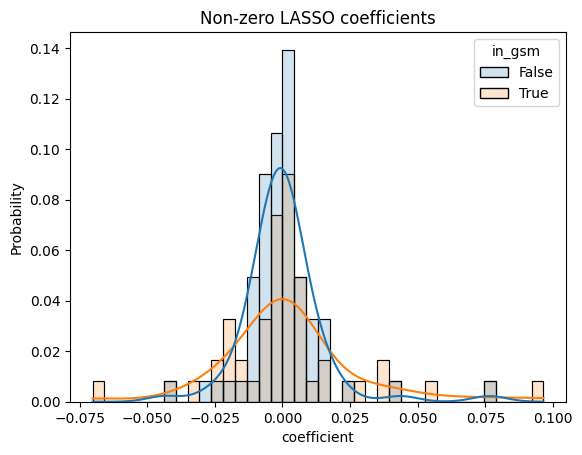

In [28]:
fig, ax = plt.subplots()
sns.histplot(data = coef_df.loc[coef_df['coefficient'] !=0], x = 'coefficient', hue = 'in_gsm', alpha = 0.2, stat = 'probability', kde = True)
ax.set_title('Non-zero LASSO coefficients')

Plot highest and lowest LASSO coefficients based on whether or not the protein is in the GSM.

<Axes: title={'center': 'Proteins NOT in GSM'}, xlabel='coefficient', ylabel='gene'>

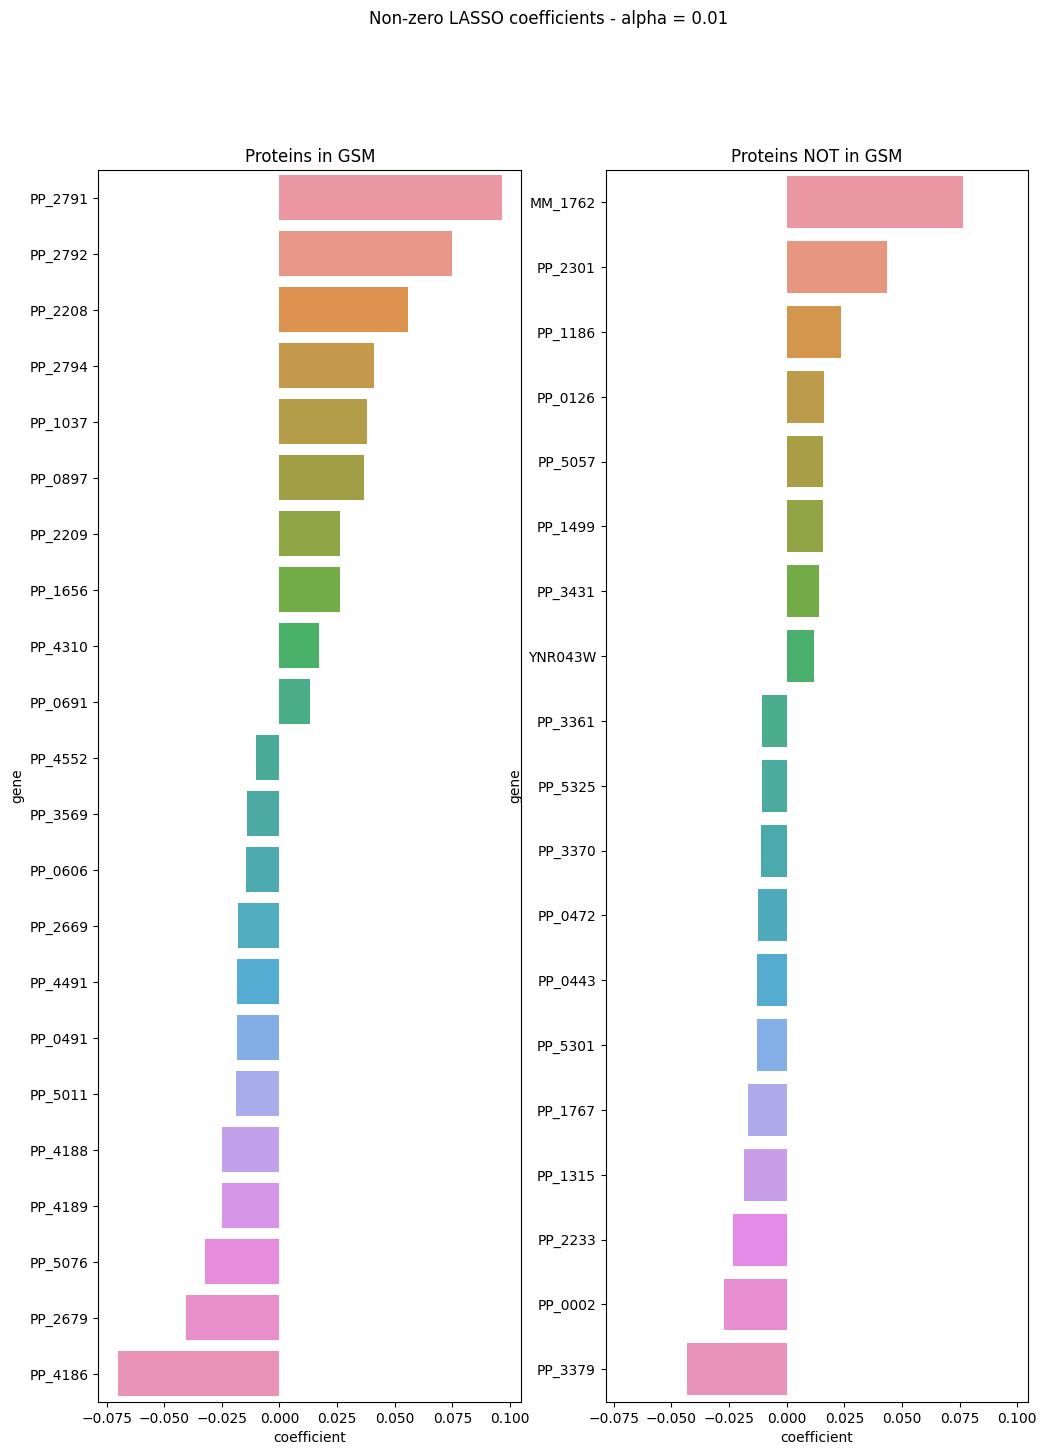

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,16), sharex = True)
fig.suptitle(f'Non-zero LASSO coefficients - alpha = {alpha_for_features}')
ax[0].set_xlabel('LASSO coefficient value')
ax[0].set_title(f'Proteins in GSM')
ax[1].set_title(f'Proteins NOT in GSM')

sns.barplot(coef_df.loc[(coef_df['coefficient'].abs()>0.01) & (coef_df['in_gsm'])].sort_values('coefficient', ascending = False),
            x = 'coefficient',
            y = 'gene',
            orient = 'h',
            ax = ax[0] 
           )

sns.barplot(coef_df.loc[(coef_df['coefficient'].abs()>0.01) & (~coef_df['in_gsm'])].sort_values('coefficient', ascending = False),
            x = 'coefficient',
            y = 'gene',
            orient = 'h',
            ax = ax[1] 
           )

## Connect to GO data
Gene ontology data describes all the putida genes and associates them with different gene ontology terms. I want to see if there are any common GO terms in the significant proteins.

Import gene ontology data pulled from uniprot:

In [30]:
go_data = pd.read_excel('./data/NamilPPDict.xlsx', sheet_name = 'CDS')
go_data.head(3)

,Type,New_tag,Old_tag,Preferred_name,Nickname,Start,End,Strand,Protein Length,Description,COG,GOs,EC,KEGG_ko,KEGG_Reaction,Entry,Entry name,Status,Protein name
0,CDS,PP_RS00005,PP_0001,parB,parB,147,1019,-,290.0,Belongs to the ParB family,L,-,-,ko:K03497,-,P0A151,PARB_PSEPK,reviewed,Probable chromosome-partitioning protein ParB
1,CDS,PP_RS00010,PP_0002,parA,parA,1029,1820,-,263.0,"PFAM Cobyrinic acid a,c-diamide synthase",D,-,-,ko:K03496,-,P0A149,Y002_PSEPK,reviewed,Uncharacterized protein PP_0002
2,CDS,PP_RS00015,PP_0003,rsmG,rsmG,1839,2489,-,216.0,Specifically methylates the N7 position of gua...,J,"GO:0000154,GO:0001510,GO:0003674,GO:0003824,GO...",2.1.1.170,ko:K03501,-,P0A124,RSMG_PSEPK,reviewed,Ribosomal RNA small subunit methyltransferase ...


In [31]:
up_data = pd.read_excel('./data/uniprotkb_proteome_UP000000556_2024_01_11.xlsx', sheet_name = 'Sheet0')
up_data.head(3)

/usr/local/art/.venv/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (molecular function),Gene Ontology (GO),Gene Ontology IDs,Gene Ontology (cellular component),Gene Ontology (biological process)
0,Q88CC1,reviewed,HGLS_PSEPK,2-oxoadipate dioxygenase/decarboxylase (EC 1.1...,hglS ydcJ PP_5260,Pseudomonas putida (strain ATCC 47054 / DSM 61...,464,dioxygenase activity [GO:0051213],dioxygenase activity [GO:0051213],GO:0051213,NaN,NaN
1,Q88E10,reviewed,MCPS_PSEPK,Methyl-accepting chemotaxis protein McpS,mcpS PP_4658,Pseudomonas putida (strain ATCC 47054 / DSM 61...,639,transmembrane signaling receptor activity [GO:...,plasma membrane [GO:0005886]; transmembrane si...,GO:0004888; GO:0005886; GO:0006935; GO:0007165,plasma membrane [GO:0005886],chemotaxis [GO:0006935]; signal transduction [...
2,Q88E47,reviewed,HGD_PSEPK,"Homogentisate 1,2-dioxygenase (HGDO) (EC 1.13....",hmgA PP_4621,Pseudomonas putida (strain ATCC 47054 / DSM 61...,433,DNA-binding transcription repressor activity [...,protein-DNA complex [GO:0032993]; DNA-binding ...,GO:0000976; GO:0001217; GO:0004411; GO:0005506...,protein-DNA complex [GO:0032993],L-phenylalanine catabolic process [GO:0006559]...


### Find the PP_XXXX number from the 'Gene Names' column.

In [32]:
def find_pp(x):
    search = re.search('PP_\d{4}', x)
    if search:
        return search.group(0)
    else:
        print(f'Gene names: {x} has no PP_XXXX number')
        return np.nan
up_data['pp'] = up_data['Gene Names'].apply(find_pp)
up_data.head(5)

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (molecular function),Gene Ontology (GO),Gene Ontology IDs,Gene Ontology (cellular component),Gene Ontology (biological process),pp
0,Q88CC1,reviewed,HGLS_PSEPK,2-oxoadipate dioxygenase/decarboxylase (EC 1.1...,hglS ydcJ PP_5260,Pseudomonas putida (strain ATCC 47054 / DSM 61...,464,dioxygenase activity [GO:0051213],dioxygenase activity [GO:0051213],GO:0051213,NaN,NaN,PP_5260
1,Q88E10,reviewed,MCPS_PSEPK,Methyl-accepting chemotaxis protein McpS,mcpS PP_4658,Pseudomonas putida (strain ATCC 47054 / DSM 61...,639,transmembrane signaling receptor activity [GO:...,plasma membrane [GO:0005886]; transmembrane si...,GO:0004888; GO:0005886; GO:0006935; GO:0007165,plasma membrane [GO:0005886],chemotaxis [GO:0006935]; signal transduction [...,PP_4658
2,Q88E47,reviewed,HGD_PSEPK,"Homogentisate 1,2-dioxygenase (HGDO) (EC 1.13....",hmgA PP_4621,Pseudomonas putida (strain ATCC 47054 / DSM 61...,433,DNA-binding transcription repressor activity [...,protein-DNA complex [GO:0032993]; DNA-binding ...,GO:0000976; GO:0001217; GO:0004411; GO:0005506...,protein-DNA complex [GO:0032993],L-phenylalanine catabolic process [GO:0006559]...,PP_4621
3,Q88F88,reviewed,PVDT_PSEPK,Pyoverdine export ATP-binding/permease protein...,pvdT PP_4210,Pseudomonas putida (strain ATCC 47054 / DSM 61...,654,ATP binding [GO:0005524]; ATP hydrolysis activ...,plasma membrane [GO:0005886]; ATP binding [GO:...,GO:0005524; GO:0005886; GO:0016887; GO:0046677,plasma membrane [GO:0005886],response to antibiotic [GO:0046677],PP_4210
4,Q88FF8,reviewed,CHRR_PSEPK,Quinone reductase (EC 1.6.5.2) (Chromate reduc...,chrR PP_4138,Pseudomonas putida (strain ATCC 47054 / DSM 61...,186,NADH dehydrogenase (quinone) activity [GO:0050...,NADH dehydrogenase (quinone) activity [GO:0050...,GO:0008753; GO:0050136,NaN,NaN,PP_4138


### Print some of the GO terms for a single protein.

In [33]:
go_cols = ['pp','Gene Ontology (molecular function)', 'Gene Ontology (GO)', 'Gene Ontology IDs', 'Gene Ontology (cellular component)', 'Gene Ontology (biological process)']
for c in go_cols:
    print(f'C = {c}\nValue = {up_data.loc[3, c]}')
up_data.loc[:, go_cols] = up_data.loc[:, go_cols].fillna('')
up_data['Gene Ontology (cellular component)'].apply(lambda x: len(x.split(';')))

C = pp
Value = PP_4210
C = Gene Ontology (molecular function)
Value = ATP binding [GO:0005524]; ATP hydrolysis activity [GO:0016887]
C = Gene Ontology (GO)
Value = plasma membrane [GO:0005886]; ATP binding [GO:0005524]; ATP hydrolysis activity [GO:0016887]; response to antibiotic [GO:0046677]
C = Gene Ontology IDs
Value = GO:0005524; GO:0005886; GO:0016887; GO:0046677
C = Gene Ontology (cellular component)
Value = plasma membrane [GO:0005886]
C = Gene Ontology (biological process)
Value = response to antibiotic [GO:0046677]


0       1
1       1
2       1
3       1
4       1
       ..
5522    1
5523    1
5524    1
5525    1
5526    1
Name: Gene Ontology (cellular component), Length: 5527, dtype: int64

### Check whether each protein is in GO data

Add a logical column to the LASSO coefficient dataframe for whether or not its in the GO database (most proteins should be)

In [34]:
coef_df.loc[:,'in_go_data'] = coef_df['gene'].apply(lambda x: x in go_data['Old_tag'].values)

### Add GO information to coefficient dataframe

In [35]:
go_delimiter = ';'

cog_dict = dict(zip(go_data['Old_tag'], go_data['COG']))
go_dict = dict(zip(up_data['pp'], up_data['Gene Ontology (cellular component)']))
coef_df['cog_num'] = coef_df['gene'].apply(lambda x: cog_dict[x] if x in go_data['Old_tag'].values else np.nan)
# coef_df['go_code'] = coef_df['gene'].apply(lambda x: go_dict[x].split(go_delimiter) if x in go_data['Old_tag'].values else [])
coef_df['go_code'] = coef_df['gene'].apply(lambda x: go_dict[x].split(go_delimiter) if x in go_data['Old_tag'].values else [])

In [36]:
coef_df.loc[coef_df['in_go_data'],:].sort_values(by = 'coefficient')

,gene,coefficient,in_gsm,num_gsm_rxns,subsystems,n_subsystems,in_go_data,cog_num,go_code
1362,PP_4186,-0.070197,True,1,[S_TCA_Cycle],1,True,F,[cytoplasm [GO:0005737]]
1207,PP_3379,-0.043470,False,0,[],0,True,G,[]
1092,PP_2679,-0.040519,True,2,[S_Aromatic_Compounds_Degradation__Phenylacety...,2,True,G,"[membrane [GO:0016020], outer membrane-bounde..."
1777,PP_5076,-0.032145,True,1,[S_Glutamate_Metabolism],1,True,E,[]
2,PP_0002,-0.027158,False,0,[],0,True,D,[]
...,...,...,...,...,...,...,...,...,...
1105,PP_2794,0.041150,True,2,"[S_Alternate_Carbon__Levulinate_Metabolism, S_...",2,True,IQ,[]
988,PP_2301,0.043595,False,0,[],0,True,O,[]
967,PP_2208,0.055877,True,1,[S_Phosphonate_and_phosphinate_metabolism],1,True,S,[]
1103,PP_2792,0.074688,True,1,[S_Alternate_Carbon__Levulinate_Metabolism],1,True,-,[]


### Visualize the GO codes present in the LASSO proteins.

<Axes: ylabel='go'>

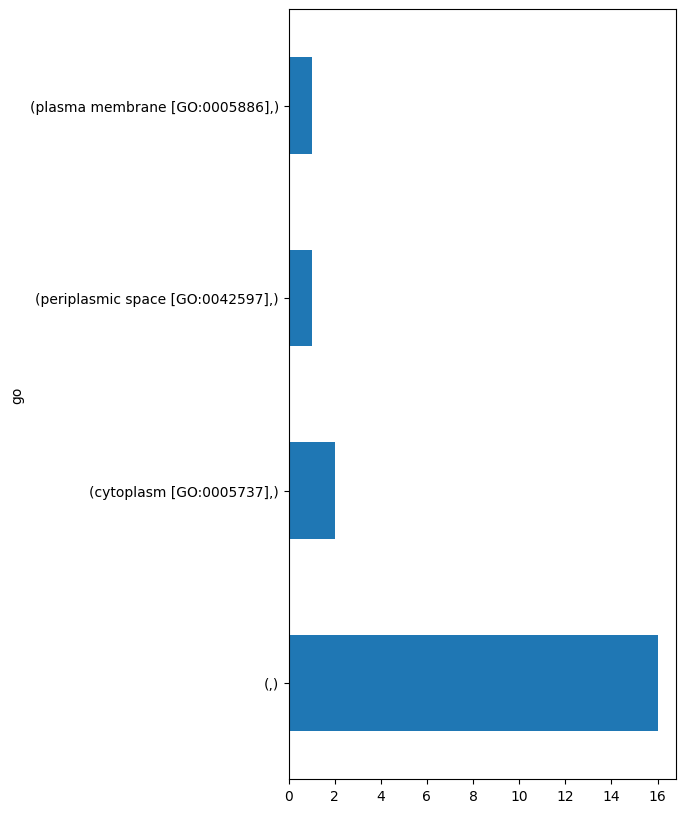

In [37]:
n_to_keep = 20
go_set = coef_df.loc[coef_df['in_go_data'],:].sort_values(by = 'coefficient', ascending = False).head(n_to_keep)['go_code']
go_list =[go for single_list in go_set for go in single_list]


go_df = pd.DataFrame(data = go_list, columns=['go'])
fig, ax = plt.subplots(figsize= (5,10))
go_df.value_counts().plot(kind = 'barh', ax = ax)